**Подолу е даден описот на базата на податоци која се користи во прашањата во овој тест.**  

**\--------------------------------------------------------------------------**

<span style="font-size: 0.9375rem;">На сликата подолу е прикажан дел од ЕР дијаграм за систем за организација на саеми за книги.</span>

<span style="font-size: 0.9375rem;" id="yui_3_18_1_1_1765075414477_81">За секој саем на книга се чуваат информации за името на саемот, времетраењето (во денови) и локацијата. Саемот секогаш се одржува на иста локација, но повеќе различни саеми може да се одржат на иста локација со текот на времето. За секоја локација се чуваат детали за име, адреса, капацитет и тип.</span>

<span style="font-size: 0.9375rem;">Саемите на книга се одржуваат на годишно ниво, а за секој одржан саем се познати почетниот датум, како и авторите кои учествувале. За секој автор се чуваат информации за неговото артистичко име и националност. Авторите може да соработуваат со издавачи (за издавачите се знаат името и спонзорите на тој издавач). За секоја соработка се следат датумот на почеток и крај на соработката помеѓу тој автор и издавачот. Авторите можат да ги менуваат издавачите со кои соработуваат со текот на времето.</span>

<span style="font-size: 0.9375rem;">За секој одржан саем на книгата, се чуваат информации за тоа кој автор го претставувал кој издавач, заедно со насловот на книгата што ја промовирале и оценката добиена од публиката за нивната презентација. На истиот саем, еден автор може да промовира различни книги од различни издавачи.</span>

| 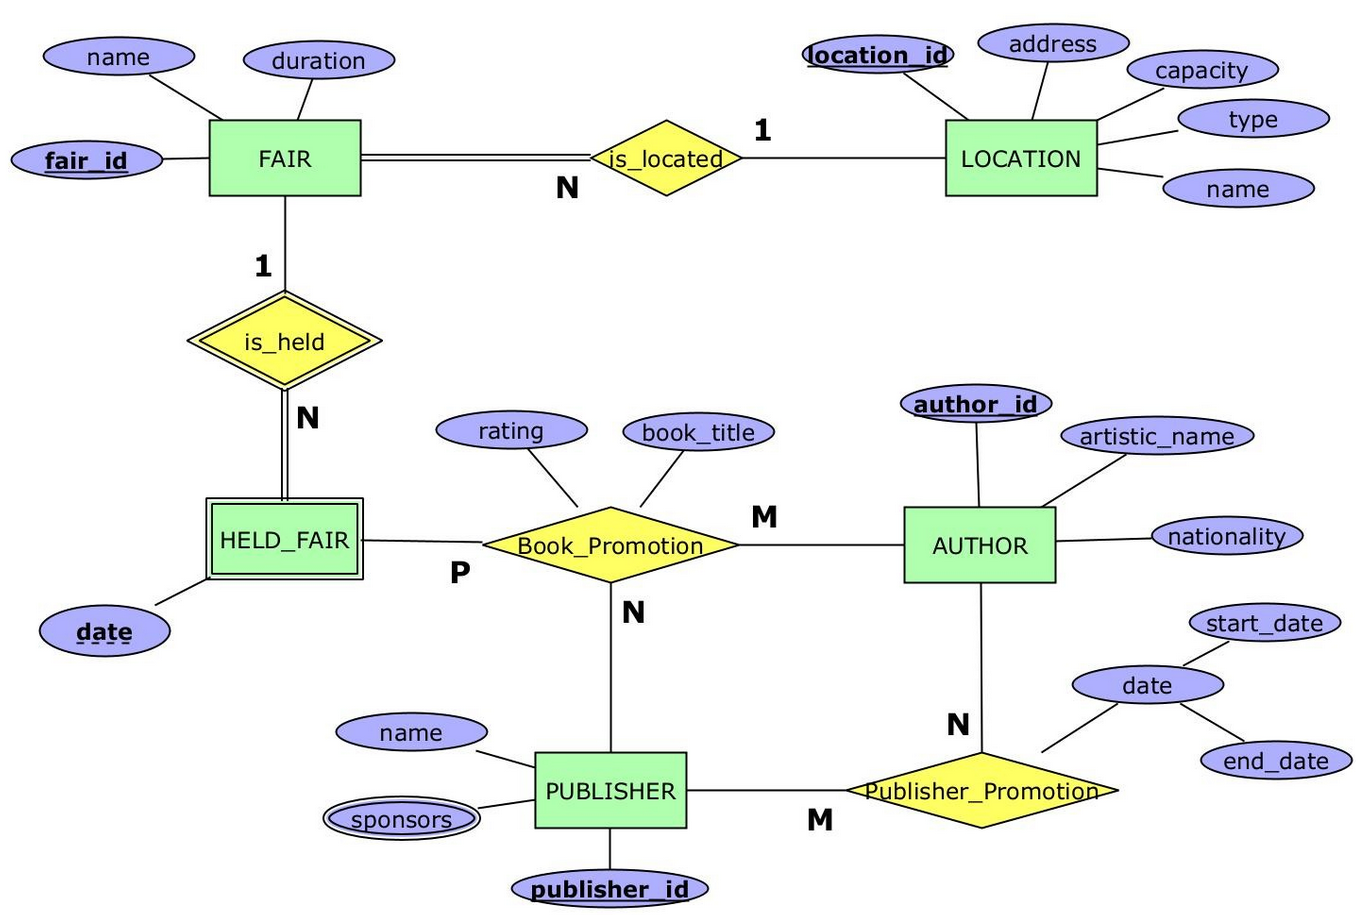<br> |  | Релационата база е дефинирана преку следните релации: <br> Location(<u>location\_id</u>, name, address, capacity, type)<br>Fair(<u>fair\_id</u>, name, duration, location\_id\*)<br>Held\_Fair(<u>fair\_id\*, date</u>)<br>Author(<u>author\_id</u>, artistic\_name, nationality)Publisher(<u>publisher\_id</u>, name)<br>Publisher\_Sponsor(<u>publisher\_id\*, sponsor</u>)<br>Publisher\_Promotion(<u>author\_id\*, publisher\_id\*, start\_date,</u> end\_date)<br>Book\_Promotion(<u>fair\_id\*, date\*, publisher\_id\*, author\_id\*,</u> book\_title, rating) |
| --- | --- | --- |

**1**.<span id="docs-internal-guid-4d3188cd-7fff-7b5e-e705-142d9b96a809" style="color: var(--vscode-foreground);"><span id="docs-internal-guid-62f9c639-7fff-8c80-a5f5-6a8ce3b29869">Да се напише DML израз со кој ќе се <strong>излистаат </strong></span></span>  **името и националноста (без дупликати, односно само уникатни вредности) на сите автори кои презентирале книга која што добила оценка поголема од 6 и во чија промоција учествувал издавач чије што име започнува со „New“, подредени според добиената оценка во растечки редослед.**

In [ ]:
SELECT DISTINCT artistic_name, nationality
FROM Author auth

INNER JOIN Book_Promotion bp
    ON auth.author_id = bp.author_id
INNER JOIN Publisher pub
    ON bp.publisher_id = pub.publisher_id

WHERE bp.rating > 6 AND pub.name LIKE '%New%'
ORDER BY bp.rating ASC

| Test | Expected | Got |  |
| --- | --- | --- | --- |
|  |  |  |  |

```
-- Testing with original db
```
```
artistic_name  nationality
-------------  -----------
Bob Stone      Brazilian
David Lee      American
Alice Winters  Canadian
Clara Tan      German
```
```
artistic_name  nationality
-------------  -----------
Bob Stone      Brazilian
David Lee      American
Alice Winters  Canadian
Clara Tan      German
```

**2.**<span id="docs-internal-guid-4d3188cd-7fff-7b5e-e705-142d9b96a809" style="color: var(--vscode-foreground);"><span id="docs-internal-guid-62f9c639-7fff-8c80-a5f5-6a8ce3b29869">Да се напише DML израз со кој ќе се <strong>излистаат </strong></span></span>  **информациите за авторите кои НЕМААТ издадено ниту една книга на одржан саем.**

In [ ]:
SELECT * 
FROM Author as Auth
WHERE Auth.author_id NOT IN 
(SELECT author_id FROM Book_Promotion);

| Test | Expected | Got |  |
| --- | --- | --- | --- |
|  |  |  |  |

```
-- Testing with original db
```
```
author_id   artistic_name  nationality
----------  -------------  -----------
10          Fiona Clarke   German
11          Harry Walton   Canadian
12          Isabella Cruz  Serbian
13          Jack Rivers    American
```
```
author_id   artistic_name  nationality
----------  -------------  -----------
10          Fiona Clarke   German
11          Harry Walton   Canadian
12          Isabella Cruz  Serbian
13          Jack Rivers    American
```

**3.**Да се напише DML израз со кој ќе се **излистаат информациита за сите саеми кои се одржувале на локации со капацитет поголем од 1000. Притоа треба да се прикажат информациите за името на саемот и локацијата на која е одржан саемот. Резултатот треба да биде подреден според името на саемот.**

In [ ]:
SELECT DISTINCT Fair.name AS fiar_name, Location.name AS location_name

FROM Book_Promotion bp
INNER JOIN Held_Fair 
    ON Held_Fair.fair_id = bp.fair_id
INNER JOIN Fair 
    ON Held_Fair.fair_id = Fair.fair_id
INNER JOIN Location
    ON Fair.location_id = Location.location_id
    
WHERE Location.capacity > 1000

-- Sorting:
-- ORDER BY Fair.name DESC

| Test | Expected | Got |  |
| --- | --- | --- | --- |
|  |  |  |  |

```
-- Testing with original db
```
```
fiar_name       location_name
--------------  -------------
Book Expo 2025  Main Hall
Literary Fest   Outdoor Pavil
International   Main Hall
Summer Literat  Outdoor Pavil
World Book Fai  Central Arena
Tech Meets Lit  Expo Hall 2
Autumn Writers  Riverside Pav
```
```
fiar_name       location_name
--------------  -------------
Book Expo 2025  Main Hall
Literary Fest   Outdoor Pavil
International   Main Hall
Summer Literat  Outdoor Pavil
World Book Fai  Central Arena
Tech Meets Lit  Expo Hall 2
Autumn Writers  Riverside Pav
```

**4.**<span id="docs-internal-guid-4d3188cd-7fff-7b5e-e705-142d9b96a809" style="color: var(--vscode-foreground);">Да се напише DML израз со кој ќе се излистаат</span> **информациите за авторите кои се промовирани од издавачи кои немаат ниту еден спонзор.**

In [ ]:
SELECT *
FROM Author
WHERE Author.author_id IN (
    SELECT author_id
    FROM Publisher_Promotion
    WHERE Publisher_Promotion.publisher_id NOT IN 
    (SELECT publisher_id FROM Publisher_Sponsor)
);

| Test | Expected | Got |  |
| --- | --- | --- | --- |
|  |  |  |  |

```
-- Testing with original db
```
```
author_id   artistic_name  nationality
----------  -------------  -----------
6           Clara Tan      German
```
```
author_id   artistic_name  nationality
----------  -------------  -----------
6           Clara Tan      German
```

**5.**<span id="docs-internal-guid-4d3188cd-7fff-7b5e-e705-142d9b96a809" style="color: var(--vscode-foreground);">Да се напише DML израз со кој ќе се излистаат</span> **имињата на авторите и на издавачите, такашто:**

- **Прикажи ги имињата на авторите вклучени во промоциите на книги со оценка над 4.**
- **Прикажи ги имињата на издавачи вклучени во промоциите  во текот на 2024 година.**

**Резултатот треба да вклучува име на автор/издавач, како и тип (кој може да има две вредности Author/Publisher)**

In [ ]:
SELECT DISTINCT Author.artistic_name AS 'name', 'Author' AS type
FROM Author
JOIN Book_Promotion 
    ON Book_Promotion.author_id = Author.author_id
WHERE Book_Promotion.rating > 4

UNION

SELECT Publisher.name, 'Publisher' AS type
FROM Publisher
JOIN Publisher_Promotion
    ON Publisher_Promotion.publisher_id = Publisher.publisher_id
WHERE Publisher_Promotion.start_date LIKE '%2024%'

| Test | Expected | Got |  |
| --- | --- | --- | --- |
|  |  |  |  |

```
-- Testing with original db
```
```
name            type
--------------  ----------
ABC Publishing  Publisher
Alice Winters   Author
Bob Stone       Author
Carlos Gonzale  Author
Clara Tan       Author
David Lee       Author
Eva Johnson     Author
George King     Author
Global Writers  Publisher
Jane Smith      Author
John Doe        Author
```
```
name            type
--------------  ----------
ABC Publishing  Publisher
Alice Winters   Author
Bob Stone       Author
Carlos Gonzale  Author
Clara Tan       Author
David Lee       Author
Eva Johnson     Author
George King     Author
Global Writers  Publisher
Jane Smith      Author
John Doe        Author
```

**6.**<span lang="MK" id="yui_3_18_1_1_1765075774478_83" style="color: var(--vscode-foreground);">Да се напише DML израз со кој ќе се</span> **прикажат датумите на одржување и името на саемот, за сите одржани саеми кои се случиле на локација од тип „OUTDOOR“ и каде што самата локација има капацитет помал од 500 посетители.**

In [ ]:
SELECT Held_Fair.date, Fair.name

FROM Held_Fair
JOIN Fair 
    ON Held_Fair.fair_id = Fair.fair_id
JOIN Location
    ON Location.location_id = Fair.location_id

WHERE Location.type = 'OUTDOOR' AND Location.capacity < 500

| Test | Expected | Got |  |
| --- | --- | --- | --- |
|  |  |  |  |

```
-- Testing with original db
```
```
date        name
----------  -------------------
2025-06-15  Leten Saem na Kniga
2025-07-01  Alter Book Fest
```
```
date        name
----------  -------------------
2025-06-15  Leten Saem na Kniga
2025-07-01  Alter Book Fest
```